<a href="https://colab.research.google.com/github/ferhat00/LLM/blob/main/Ytd_returns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

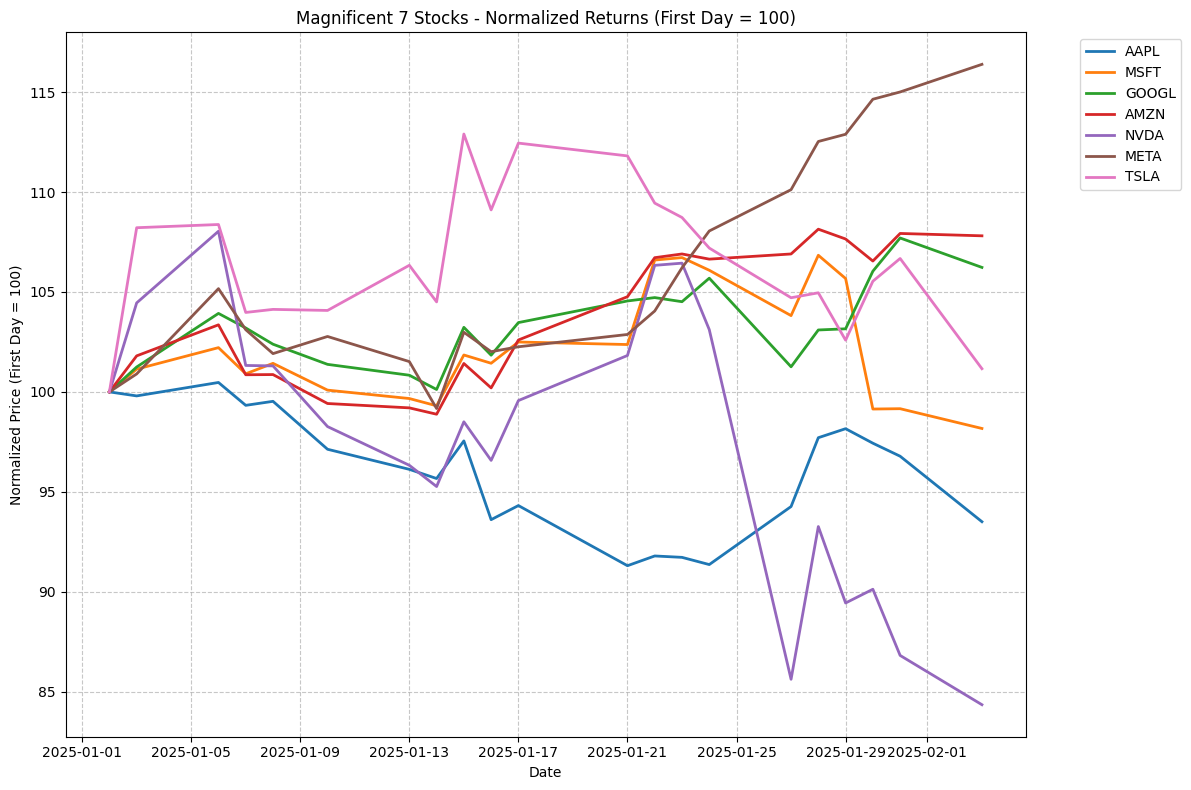


Summary Statistics:
       Starting Price  Current Price  Total Return (%)  Max Drawdown (%)  \
AAPL           243.85         228.01             -6.50          9.126531   
MSFT           418.58         410.92             -1.83          8.112701   
GOOGL          189.43         201.23              6.23          4.195595   
AMZN           220.22         237.42              7.81          4.327578   
NVDA           138.31         116.66            -15.65         21.930001   
META           599.24         697.46             16.39          5.704538   
TSLA           379.28         383.68              1.16         10.401196   

       Volatility (%)  Sharpe Ratio  
AAPL        31.424429     -2.538772  
MSFT        33.570959     -0.531654  
GOOGL       27.958427      2.860637  
AMZN        22.088802      4.402491  
NVDA        84.671290     -2.098262  
META        27.409192      7.133118  
TSLA        55.309488      0.519847  

Correlation Matrix:
       AAPL  MSFT  GOOGL  AMZN  NVDA  META  T

In [8]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
from datetime import datetime

def analyze_magnificent_seven(start_date, end_date=None):
    # Magnificent 7 stock tickers
    tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'TSLA']

    # Create empty DataFrame to store all stock data
    all_data = pd.DataFrame()

    # Download data for each stock using pandas_datareader
    for ticker in tickers:
        try:
            stock_data = pdr.DataReader(ticker, 'stooq', start=start_date, end=end_date)['Close']
            all_data[ticker] = stock_data
        except Exception as e:
            print(f"Error downloading data for {ticker}: {e}")

    # Sort index to ensure chronological order
    all_data = all_data.sort_index()

    # Normalize all stocks to 100 at the start of the period
    first_day_prices = all_data.iloc[0]
    normalized_data = (all_data / first_day_prices) * 100

    # Create the plot
    plt.figure(figsize=(12, 8))
    for column in normalized_data.columns:
        plt.plot(normalized_data.index, normalized_data[column], label=column, linewidth=2)

    plt.title('Magnificent 7 Stocks - Normalized Returns (First Day = 100)')
    plt.xlabel('Date')
    plt.ylabel('Normalized Price (First Day = 100)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Calculate performance metrics using normalized data
    returns = normalized_data.pct_change()

    summary_stats = pd.DataFrame({
        'Starting Price': first_day_prices.round(2),
        'Current Price': all_data.iloc[-1].round(2),
        'Total Return (%)': ((normalized_data.iloc[-1] - 100)).round(2),
        'Max Drawdown (%)': ((normalized_data.cummax() - normalized_data) / normalized_data.cummax()).max() * 100,
        'Volatility (%)': returns.std() * 100 * np.sqrt(252),  # Annualized
        'Sharpe Ratio': (returns.mean() * 252) / (returns.std() * np.sqrt(252))  # Assuming risk-free rate = 0
    })

    return normalized_data, plt, summary_stats

# Example usage:
start_date = '2025-01-01'
data, plot, stats = analyze_magnificent_seven(start_date)

# Display the plot
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print(stats)

# Calculate and display correlation matrix
correlation_matrix = data.pct_change().corr().round(2)
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Print relative performance comparison
print("\nRelative Performance Since Start:")
final_performance = data.iloc[-1].sort_values(ascending=False)
for ticker in final_performance.index:
    print(f"{ticker}: {(final_performance[ticker] - 100):+.2f}%")